# Aplicación - Knowledge Managment Officer - Proj. "Habla Tiburón" - CDF
# Jaime Florez   -   Prueba Técnica

## 2nd Exercise - Displaying Map with Specimens Localities
## NOTE:  **This exercise was completed AFTER submission date**
---

## Initial Data Preparation & Data Exploration

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
os.getcwd()

'C:\\Users\\jaime\\CDF_KMO_TechnicalTest'

In [3]:
shapeFile = gpd.read_file('Perfil_Islas_GPS/Islas_General_GPS.shp')

<Axes: >

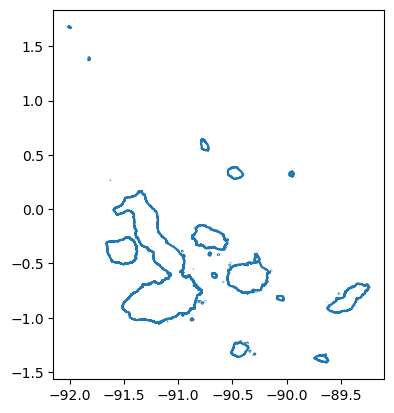

In [4]:
shapeFile.boundary.plot()
#shapeFile.plot()

In [5]:
df = pd.read_csv('CDFCollections240508csv.csv')
df_points = df[['CollectionCode', 'LatitudeDecimal', 'LongitudeDecimal']]
print(f'No. Records (specimens): {df_points.shape[0]}')

No. Records (specimens): 64765


In [6]:
# Checking if specimen locations extend too far from the islands
df_points.describe()

,LatitudeDecimal,LongitudeDecimal
count,64765.000000,64765.000000
mean,-0.765652,-90.167748
std,3.521754,7.027423
min,-90.893643,-121.735833
25%,-0.860555,-91.009984
50%,-0.674444,-90.403944
75%,-0.422100,-90.304275
max,90.722076,91.385528


##### According to output above, some specimens were collected very far from Galapagos. 
##### Displayed specimens area needs to be restricted so islands are visible (i.e. don't become so small because large extension displayed).
##### Max and Min coordinates were estimated by eye from islands plot above.

In [7]:
df_points = df_points[df_points['LatitudeDecimal'].between(-1.9, 1.7) & df_points['LongitudeDecimal'].between(-92.05, -88.8)]

In [8]:
print(f'No. Records (specimens) after restricting records area: {df_points.shape[0]}')

No. Records (specimens) after restricting records area: 64460


## Preparing data to display the map with records

In [9]:
print(shapeFile.crs)
# shapeFile.crs              -  gives more info
# shapeFile.crs.to_epsg()    -  gets the EPSG directly (ie. only the number)

EPSG:4326


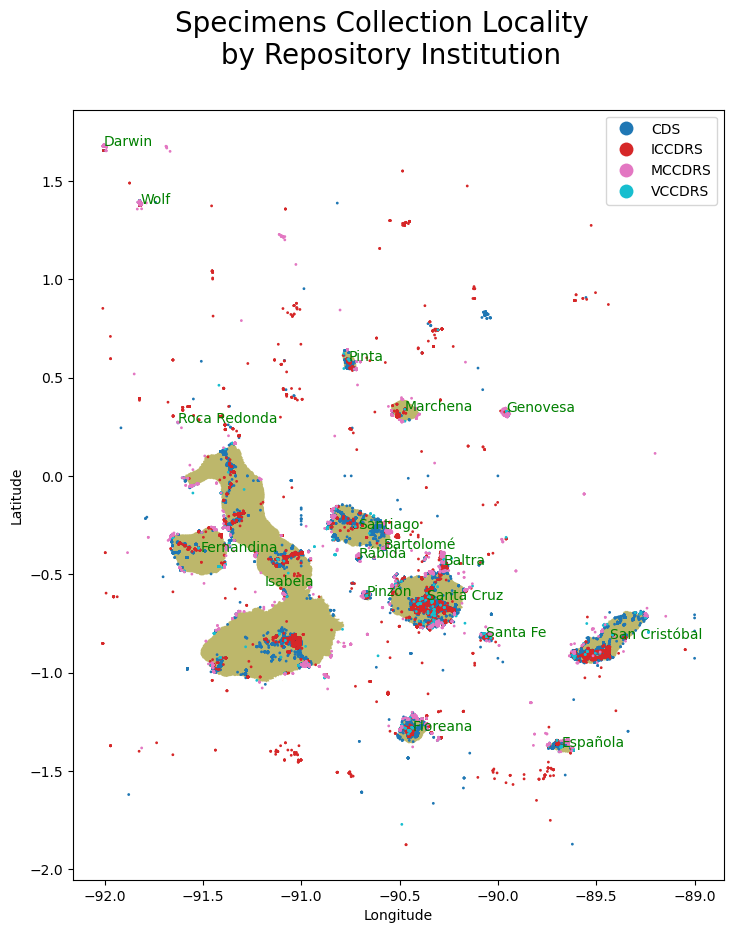

In [11]:
Points = gpd.GeoDataFrame(
    df_points, geometry=gpd.points_from_xy(df_points.LongitudeDecimal, df_points.LatitudeDecimal), crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(10,10))
shapeFile.plot(ax=ax, color='darkkhaki')

shapeFile.apply(lambda x: ax.annotate(text=x['isla'], xy=x.geometry.centroid.coords[0], ha='left', color='green'), axis=1)

Points.plot(ax=ax,column='CollectionCode', legend=True, markersize=1)

fig.suptitle('Specimens Collection Locality \n by Repository Institution', fontsize=20)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')
plt.show()